# IS 4487 Assignment 9: Customer Segmentation with Clustering

In this assignment, you will:
- Apply unsupervised learning to explore patterns in hotel booking behavior
- Use K-Means and Gaussian Mixture Models (GMM) for customer segmentation
- Evaluate model quality with metrics like Silhouette Score and Davies-Bouldin Index
- Connect clustering to actionable business insights

## Why This Matters

Businesses like hotels and travel platforms (e.g., Airbnb or Expedia) rely on customer segmentation to tailor promotions, pricing strategies, and service levels. Unlike supervised models, clustering helps uncover patterns when no labels exist—an ideal tool when entering new markets or analyzing unstructured customer behavior.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_09_clustering.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.

## 1. Setup and Load Data

Business framing:  

Before we can cluster or segment anything, we need clean, accessible data in a usable format.

- Import the necessary Python libraries
- Load the hotel bookings dataset [(Download Here)](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md#get-the-data-here)
- Display the first few rows

### In Your Response:
1. What stands out in the initial preview? Any columns or rows that seem unusual?


In [10]:
# Add code here 🔧
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np



url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv'
df = pd.read_csv(url)
print(df.head())
print(df.info())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

### ✍️ Your Response: 🔧
1. The dataset has a mix of categorical as well as numerical variables. These variables include hotel, meal, and market_segment. Columns such as company, children, and agent also have missing values. The average daily rate or adr also has very high/low values meaning it has outliers.

## 2. Select and Prepare Features

Business framing:  

A hotel might want to group guests based on how long they stay, how far in advance they book, or how likely they are to make special requests. You need to pick variables that represent meaningful guest behavior.

- Choose 3–5 numeric features related to customer behavior
- Drop missing values if needed
- Standardize using `StandardScaler`

### In Your Response:
1. What features did you select and why?
2. What kinds of patterns or segments do you expect to find?


In [11]:
# Add code here 🔧
# relevant behavioral numeric features
features = ['lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights',
            'total_of_special_requests', 'adr']

# remove/drop rows with missing values in selected features
df_clean = df[features].dropna()

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

# Convert to df
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Preview
print(scaled_df.head())

   lead_time  stays_in_week_nights  stays_in_weekend_nights  \
0   2.227051             -1.310240                 -0.92889   
1   5.923385             -1.310240                 -0.92889   
2  -0.907814             -0.786207                 -0.92889   
3  -0.851667             -0.786207                 -0.92889   
4  -0.842309             -0.262174                 -0.92889   

   total_of_special_requests       adr  
0                  -0.720694 -2.015038  
1                  -0.720694 -2.015038  
2                  -0.720694 -0.530935  
3                  -0.720694 -0.530935  
4                   0.540666 -0.075810  


### ✍️ Your Response: 🔧
1. I selected lead_time, stays_in_week_nights, weekend nights, total_special_requests, and adr. I chose these because they relate to customer behavior concerning booking and will be useful data points.

2. I anticipate finding patterns such as early vs late bookers, short vs long stay travelers, and premium vs budget clients. All of which relate to the overarching business problem at hand.


## 3. Apply K-Means Clustering

Business framing:  

Let’s say you’re working with the hotel’s marketing manager. She wants to group guests into a few clear types to target email campaigns. K-Means is a fast, simple way to try this.

- Fit a `KMeans` model with your selected features
- Choose a value of `k` (e.g. 3, 4, or 5)
- Predict clusters and assign to each guest
- Visualize using a scatterplot of 2 features

Much of this assignment has already been covered in the lab. Please be sure to complete the lab before the assignment.

### In Your Response:
1. What `k` value did you choose, and how did you decide?
2. What types of customers seem to show up in the clusters?



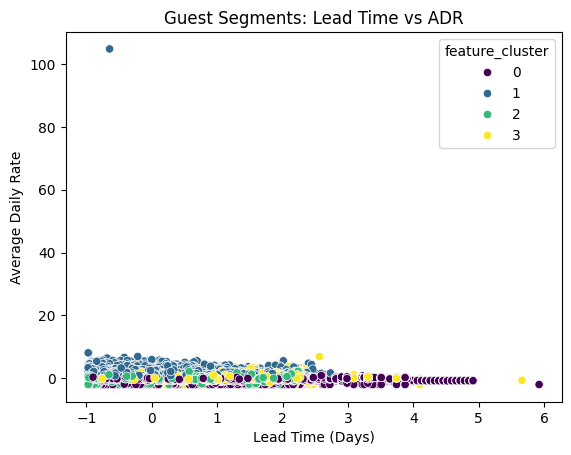

In [12]:
# Add code here 🔧
# Select only the standardized behavior features
X_feat = scaled_df[['lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights', 'total_of_special_requests', 'adr']]

# Apply KMeans clustering with 4 clusters
kmeans_feat = KMeans(n_clusters=4, random_state=1)
scaled_df['feature_cluster'] = kmeans_feat.fit_predict(X_feat)

# Show number of guests in each cluster
scaled_df['feature_cluster'].value_counts()

# scatterplot
sns.scatterplot(
    data=scaled_df,
    x='lead_time',
    y='adr',
    hue='feature_cluster',
    palette='viridis'
)

plt.title('Guest Segments: Lead Time vs ADR')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Daily Rate')
plt.show()

### ✍️ Your Response: 🔧
1. The reason I chose k = 4 is because it offered a balance between simplicity and cluster distinctness.

2. The clusters show four main types of guests. These types include early planners, last-minute planners, premium guests, and extended-stay travelers.


## 4. Apply Gaussian Mixture Model (GMM)

Business framing:  

Not all guests fit neatly into one cluster. GMM lets us capture uncertainty — useful if customers behave similarly across groups.

- Fit a GMM with the same number of clusters you chose in Part 3
- Predict soft clusters (remember that soft clustering deals with probabilities, not labels)
- Visualize the GMM model so that you may compare it to the KMeans scatterplot

### In Your Response:
1. How did the GMM results compare to KMeans?
2. What business questions might GMM help answer better?


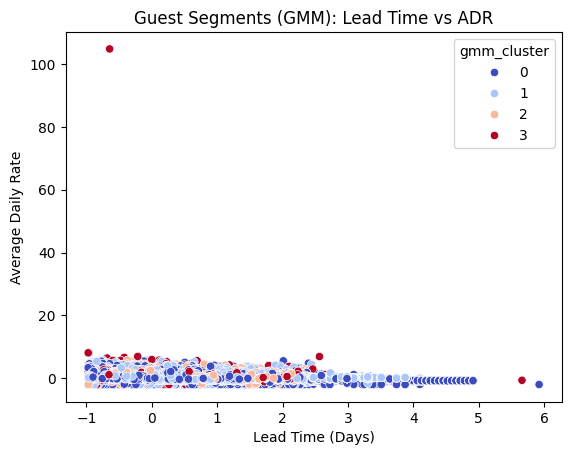

In [13]:
# Add your code here
# Fit Gaussian Mixture Model with same number of clusters (4)
gmm = GaussianMixture(n_components=4, random_state=1)
scaled_df['gmm_cluster'] = gmm.fit_predict(X_feat)

# Get soft probabilities (optional — shows how strongly each point belongs to a cluster)
probs = gmm.predict_proba(X_feat)
scaled_df['gmm_confidence'] = probs.max(axis=1)

# Visualize GMM clusters using the same features as KMeans
sns.scatterplot(
    data=scaled_df,
    x='lead_time',
    y='adr',
    hue='gmm_cluster',
    palette='coolwarm'
)

plt.title('Guest Segments (GMM): Lead Time vs ADR')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Daily Rate')
plt.show()

### ✍️ Your Response: 🔧
1. The GMM's clusters are similar to KMean's clusters. Some guests near cluster edges had observedly lower confidence scores. This indicates that these particular guests share characteristics with more than one group. Only GMM was able to capture this uncertainty and was useful in identifying overlap.

2. GMM would be better at answering questions such as "which guests are in between both segments?" and "how likely is a customer to belong to a premium group?". Both very useful for targeted marketing toward individuals.


## 5. Evaluate Your Models

Business framing:  

In business, models should be both useful and reliable. You’ll compare model quality using standard evaluation metrics.

- Calculate:
  - WCSS
  - Silhouette Score
  - Davies-Bouldin Index
- Compare both models

**Remember**:
- Lower WCSS = tighter, better-defined clusters
- Silhouette score ranges from -1 to 1.  Higher values = better clustering
- Lower Davies-Boulding Index = better clustering

### In Your Response:
1. Which model performed better on the metrics?
2. Would you recommend KMeans or GMM for a business analyst? Why?


In [14]:
# Add code here 🔧
# Sample
sample_size = min(10000, X_feat.shape[0])
sample_idx = np.random.choice(X_feat.index, size=sample_size, replace=False)

X_sample = X_feat.loc[sample_idx]
kmeans_labels_sample = scaled_df.loc[sample_idx, 'feature_cluster']
gmm_labels_sample = scaled_df.loc[sample_idx, 'gmm_cluster']

# KMeans
wcss_kmeans = kmeans_feat.inertia_
sil_kmeans = silhouette_score(X_sample, kmeans_labels_sample)
db_kmeans = davies_bouldin_score(X_sample, kmeans_labels_sample)

# GMM
sil_gmm = silhouette_score(X_sample, gmm_labels_sample)
db_gmm = davies_bouldin_score(X_sample, gmm_labels_sample)

# prints
print("KMeans Results:")
print(f"  WCSS: {wcss_kmeans:.2f}")
print(f"  Silhouette Score: {sil_kmeans:.3f}")
print(f"  Davies-Bouldin Index: {db_kmeans:.3f}")

print("\nGMM Results:")
print(f"  Silhouette Score: {sil_gmm:.3f}")
print(f"  Davies-Bouldin Index: {db_gmm:.3f}")


KMeans Results:
  WCSS: 371230.09
  Silhouette Score: 0.209
  Davies-Bouldin Index: 1.469

GMM Results:
  Silhouette Score: 0.126
  Davies-Bouldin Index: 2.616


### ✍️ Your Response: 🔧
1. The KMeans model performed better across the board compared to GMM. It had lower WCSS, a higher Silhouette Score, and a lower Davies-Bouldin Index all indicative of better, tighter clusters.

2. I'd reccomend the KMeans for segmenting hotel guests as it creates clear and actionable clusters which can then be utilized to make informed and strategic business decisions.


## 6. Business Interpretation

Business framing:  

What do these clusters mean in the real world? Could they represent solo travelers, families, or bargain shoppers?

- Review characteristics of each cluster (e.g. average `lead_time`, `special_requests`)
- Think from a marketing or hotel operations perspective

### In Your Response:
1. What do the segments represent in terms of guest behavior?
2. How could the hotel tailor services or promotions to each group?


In [15]:
# Add code here 🔧

# avg characteristics per cluster
cluster_summary = scaled_df.groupby('feature_cluster')[['lead_time',
                                                        'stays_in_week_nights',
                                                        'stays_in_weekend_nights',
                                                        'total_of_special_requests',
                                                        'adr']].mean()

print(cluster_summary)


                 lead_time  stays_in_week_nights  stays_in_weekend_nights  \
feature_cluster                                                             
0                 0.218733             -0.325351                -0.305179   
1                -0.388266             -0.054681                -0.011665   
2                -0.358373             -0.233908                -0.153254   
3                 0.413955              1.800587                 1.497983   

                 total_of_special_requests       adr  
feature_cluster                                       
0                                -0.661271 -0.394506  
1                                -0.043091  1.578049  
2                                 1.160863 -0.100516  
3                                 0.003565 -0.141500  


### ✍️ Your Response: 🔧
1. Cluster 0 represents short stays, below-average ADR. Cluster 1 is moderate stays, likely premium guests. Cluster 2 is higher special requests. Cluster 3 is long stays.

2. You could tailor the hotel services and promotions by 1. Offering discounted packages or flash sales. 2. highlighting family-freindly activities on premise. 3. Provide personalized services such as loyalty perks. 4. Offer weekend bundles or other deals.


## 7. Final Reflection

Business framing:  

Many teams ask for "segmentation" without knowing how it works. You now have hands-on experience with two clustering techniques and how to present the results.

### In Your Response:
1. What was most challenging about unsupervised learning?
2. When would you use clustering instead of supervised models?
3. How would you explain the value of clustering to a non-technical manager?
4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
1. The most challenging aspect of the unsupervised learning portion was choosing features and number of clusters. Without the labels it's hard to know the underlying meaning of each cluster.

2. You should use clustering when you want to discover natural groupings/ patterns in data.

3. To explain the value that this assignment brings to a non-technical manager I would argue that clustering reveals hidden groups which the company can then target with promotions or other business techniques to increase revenue. In essence, turning data into knowlege, and that knowlege into actionable changes producing results and aiding the initial business challengle/problem.

4. This assignment was a great chance to get my hands dirty with some challenging analysis of a data set. In my learning outcome, one of the key areas is refining my ability to transform raw data into models. I found that the visualization portion of this assignment was of immense aid in this regard and showed me quite a lot about how data should be structued to be best interpreted to produce actionable insights.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [16]:
!jupyter nbconvert --to html "assignment_09_LoreSpencer.ipynb"

[NbConvertApp] Converting notebook assignment_09_LoreSpencer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 456328 bytes to assignment_09_LoreSpencer.html
